In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from NV import *

[  1.17956980e+01   8.12721960e-03   9.74152963e-01   3.31429887e+02
   1.00724115e+02]


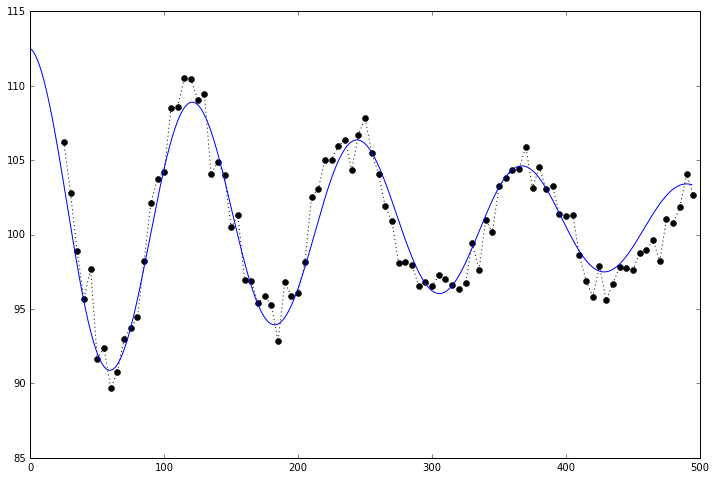

In [2]:
def EPR_NoRef(EPRfiles,Pfiles):
    pseq = np.loadtxt(Pfiles)
    files = glob.glob(EPRfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = epr[:,0]
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0] - (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)
        
    return pseq,d_sum

time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-4-16\MNP 4 on CPW 5mW x-10 y116 B0.5V T90 Rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-4-16\MNP 4 on CPW 5mW x-10 y116 B0.5V T90 Rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0

[  1.50401781e+01   1.17211801e-02  -1.90260907e+00   5.24064301e+02
   1.00896381e+02]


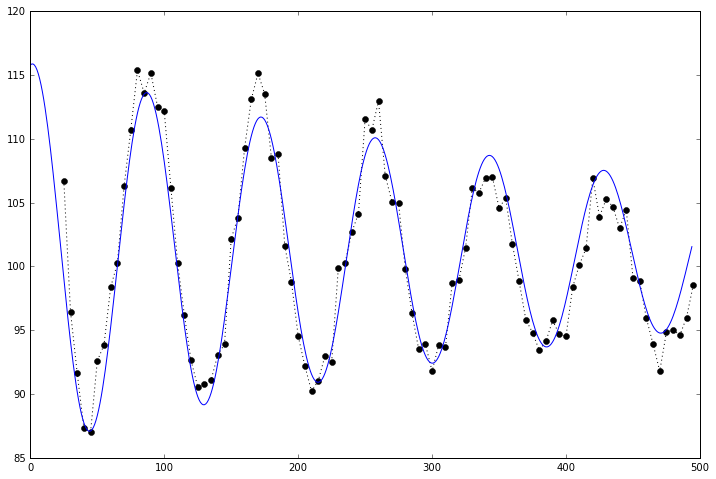

In [3]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-4-16\MNP 4 on CPW 5mW x-10 y116 B0.5V T90 -6dbm Rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-4-16\MNP 4 on CPW 5mW x-10 y116 B0.5V T90 Rabi -6dbm Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0

[  22804.28213645     939.26561323  116371.65445605]
(129212.21052631579, 0.0027819429645481153, 0.036338409958309961)


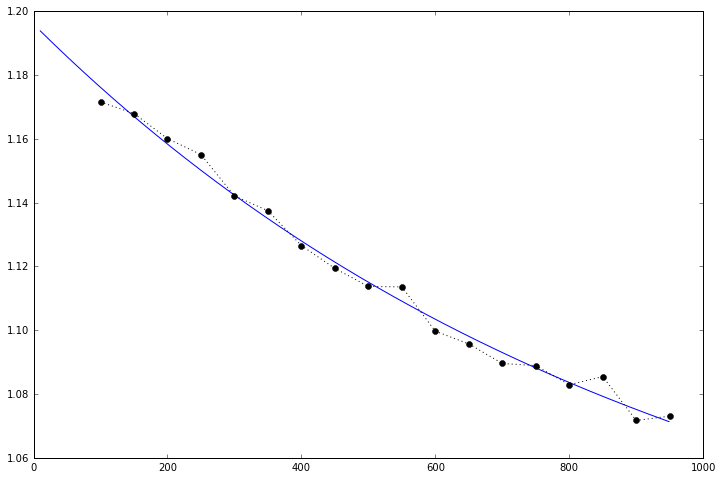

In [9]:
def T2Fit(t,C,tau,D):
    return C*np.exp(-t/tau)+D

#time,hahn0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\9-21-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm 2 hahn  *[0-9]',
#              r'C:\Users\Ouyang Group\Documents\Data\9-21-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm 2 hahn  Pulse Seq')
time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-4-16\MNP 4 on CPW 5mW x-10 y116 B0.5V T90 Hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-4-16\MNP 4 on CPW 5mW x-10 y116 B0.5V T90 Hahn Pulse Seq')
#hahn0 = hahn0#-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(80,2600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0)/opt0[2],'b-')
plt.plot(time[1:],hahn1[1:]/opt0[2],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

[ 17618.39567916    729.59463878  87180.91263437]
(92085.699999999997, 0.0032953678708448177, 0.048948599894289908)


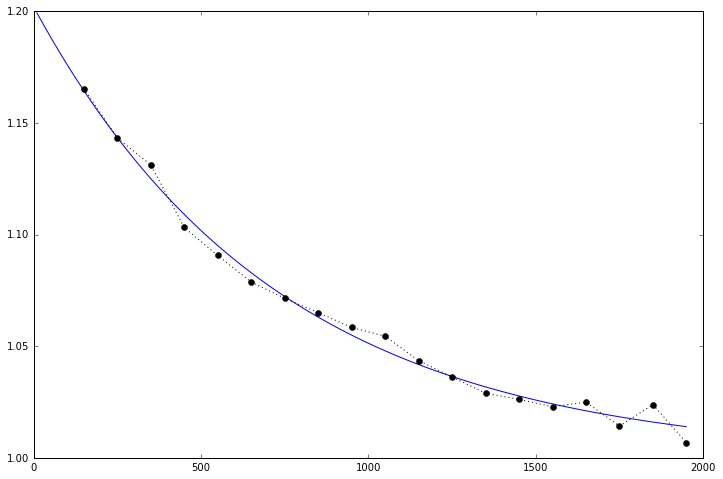

In [21]:
def EPR(EPRfiles,Pfiles):
    files = glob.glob(EPRfiles)
    pseq = np.loadtxt(Pfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = (epr[:,0]-epr[:,1])
        diff[np.isinf(diff)] = 0
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0]- (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)        
    return pseq,d_sum
time,hahn0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\10-4-16\MNP 4 on CPW 5mW x-10 y116 B0.5V T90 -6dbm hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-4-16\MNP 4 on CPW 5mW x-10 y116 B0.5V T90 -6dbm hahn Pulse Seq')
time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-4-16\MNP 4 on CPW 5mW x-10 y116 B0.5V T90 -6dbm hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-4-16\MNP 4 on CPW 5mW x-10 y116 B0.5V T90 -6dbm hahn Pulse Seq')
hahn0 = hahn0-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(80,600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0)/opt0[2],'b-')
plt.plot(time[1:],hahn1[1:]/opt0[2],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

Phi: 244.504581 +/- 0.342837
Theta: 65.619069 or +/- 0.494238
Phi(naive): 245.730000
Theta(naive): 69.339896


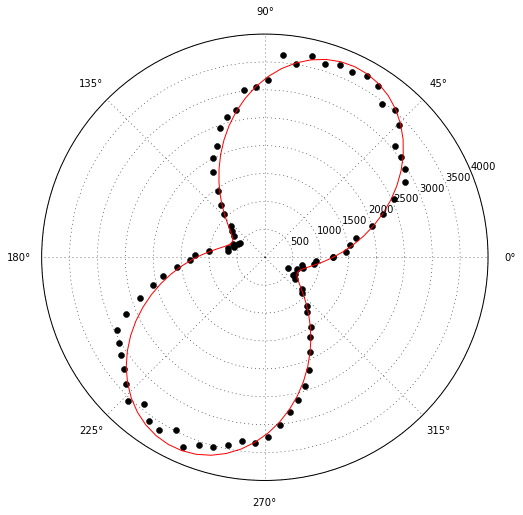

In [23]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-4-16\MNP 4 on CPW 0.5mW x-10 y116 rotor sweep')
T1[:,1] -= 1459
OrientPol(T1,False)

In [24]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh import palettes
output_notebook()
TOOLS = "box_zoom,box_select,crosshair,hover,resize,reset"
import pandas as pd

Loading BokehJS ...

In [26]:
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\10-4-16\MNP 4 on CPW 0.5mW x-10 y116 t79 d2.1 th75 ODMR *V.txt')
output_file("10-4-16 Dot 1 ODMR 2.html")
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::3]
Bs = np.linspace(0,2,len(files))*(11/0.5)
p = figure(x_range=[Bs[0],Bs[-1]], y_range=[bsweep[4,0],bsweep[-2,0]],tools=TOOLS)
p.image(image=[diffs],x=Bs[0], y=bsweep[4,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[4,0]], palette='RdPu9')
p.line(Bs,2.864E9+28E6*Bs,line_dash=(6,6),line_color='black')
p.line(Bs,2.864E9-28E6*Bs,line_dash=(6,6),line_color='black')
show(p)

[  1.33941580e+01   1.29451588e-02  -7.49534959e-01   2.52784121e+02
   1.00651819e+02]


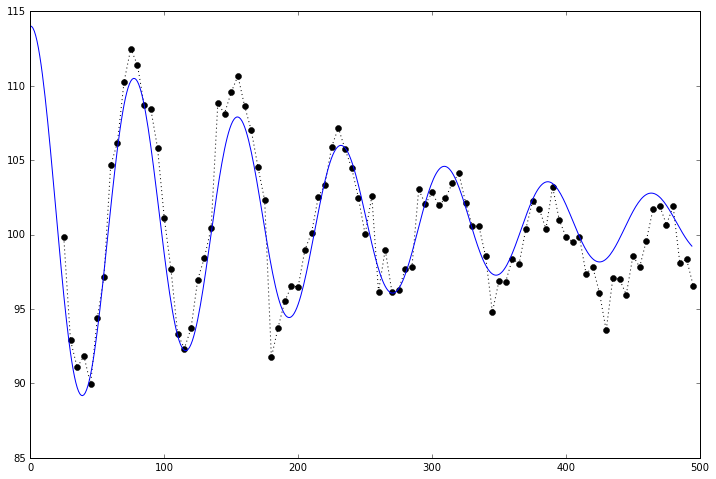

In [33]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-5-16\MNP on CPW 5mW  x-33 y140 t79 d2.1 th75 B0.29V -6dbm Rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-5-16\MNP on CPW 5mW  x-33 y140 t79 d2.1 th75 B0.29V -6dbm Rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0

[  14936.50358261     567.40381865  100140.745433  ]
(103161.14999999999, 0.0031134501215670943, 0.039178257988589725)


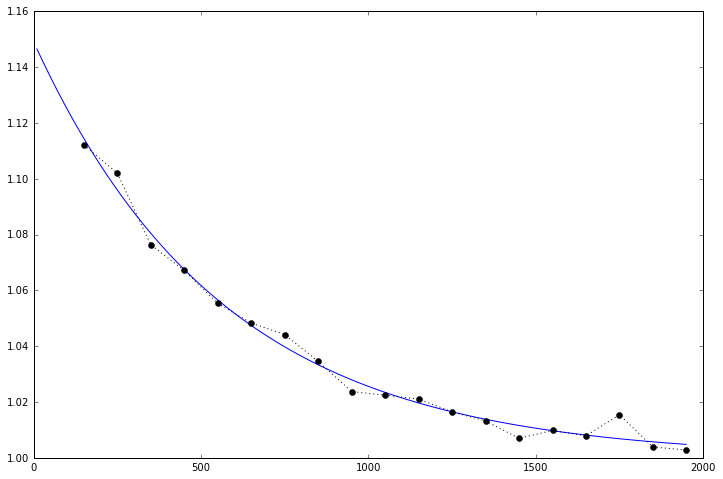

In [28]:
def EPR(EPRfiles,Pfiles):
    files = glob.glob(EPRfiles)
    pseq = np.loadtxt(Pfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = (epr[:,0]-epr[:,1])
        diff[np.isinf(diff)] = 0
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0]- (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)        
    return pseq,d_sum
time,hahn0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\10-5-16\MNP on CPW 5mW  x-33 y140 t79 d2.1 th75 B0.29V -6dbm hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-5-16\MNP on CPW 5mW  x-33 y140 t79 d2.1 th75 B0.29V -6dbm hahn Pulse Seq')
time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-5-16\MNP on CPW 5mW  x-33 y140 t79 d2.1 th75 B0.29V -6dbm hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-5-16\MNP on CPW 5mW  x-33 y140 t79 d2.1 th75 B0.29V -6dbm hahn Pulse Seq')
hahn0 = hahn0-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(80,600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0)/opt0[2],'b-')
plt.plot(time[1:],hahn1[1:]/opt0[2],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

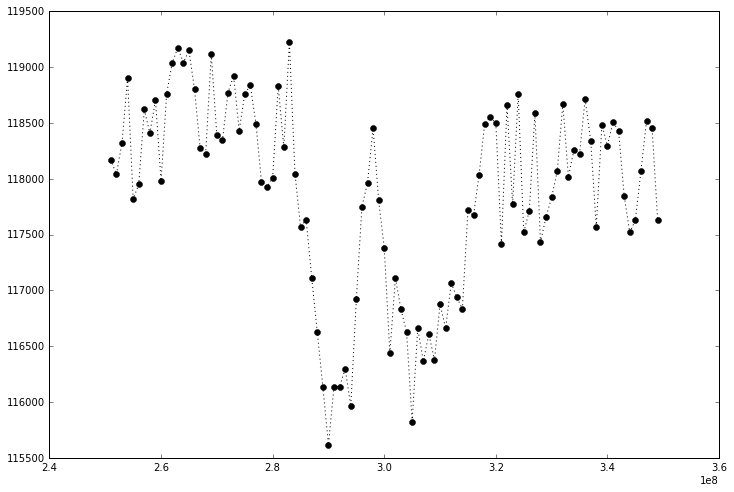

In [40]:
rf = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-4-16\MNP 4 on CPW 5mW x-10 y116 B0.5V T90 -6dbm RF sweep 2')
plt.plot(rf[1:,0],rf[1:,1],'ko:')

[ -9.57737365e+02   4.41380282e-03   1.17547294e+02   1.98051850e+02
   6.68459880e+04]


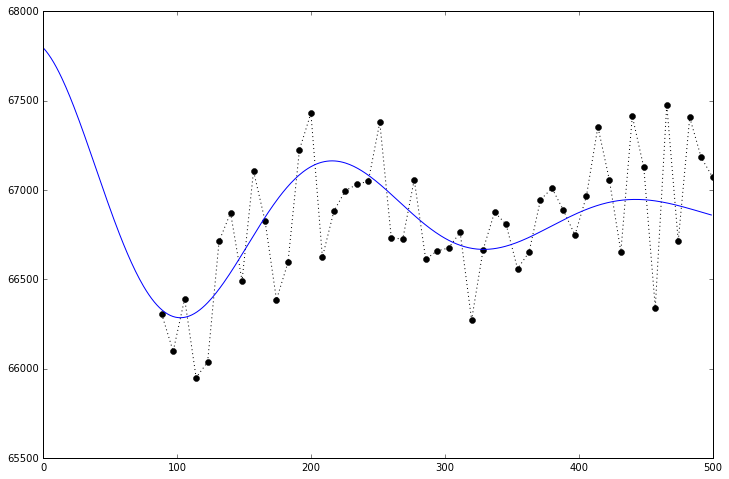

In [39]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-5-16\MNP on CPW 5mW  x-33 y140 t79 d2.1 th75 B0.29V -6dbm RF238MHz rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-5-16\MNP on CPW 5mW  x-33 y140 t79 d2.1 th75 B0.29V -6dbm RF238MHz rabi Pulse Seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0

[  3.83941911e-01   1.48123280e-02  -4.99874280e+01   2.21014790e+02
   1.00343152e+02]


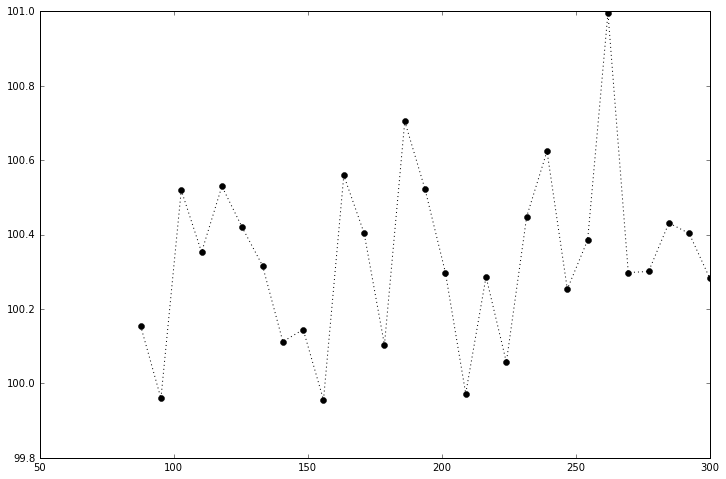

In [51]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-5-16\MNP on CPW 5mW  x-33 y140 t79 d2.1 th75 B0.29V -6dbm RF170MHz rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-5-16\MNP on CPW 5mW  x-33 y140 t79 d2.1 th75 B0.29V -6dbm RF170MHz rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
#plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0

6.53571428571
169.928571429


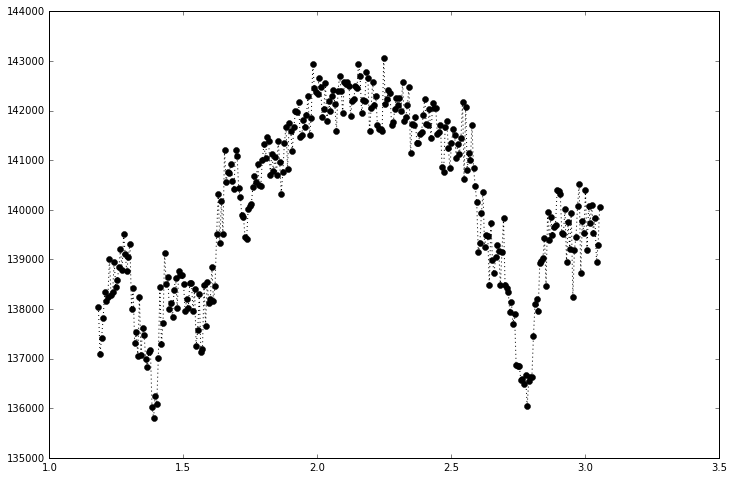

In [45]:
b = (3048-2865)/28.0
print b
print b*26
rf = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-5-16\MNP on CPW 5mW  x-33 y140 t79 d2.1 th75 B0.29V -6dbm tau300ns RF sweep 3')
plt.plot(rf[1:,0]/(b*13E6),rf[1:,1],'ko:')

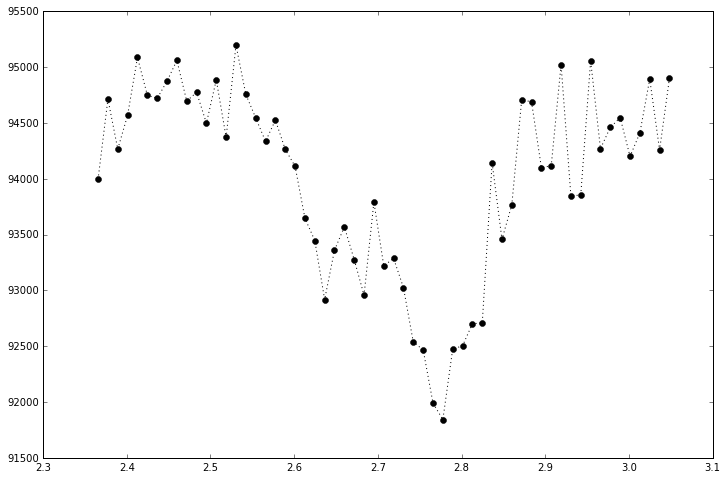

In [47]:
rf = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-5-16\MNP on CPW 5mW  x-33 y140 t79 d2.1 th75 B0.29V -6dbm tau300ns RF sweep 2')
plt.plot(rf[1:,0]/(b*13E6),rf[1:,1],'ko:')